# Comparaison des algorithmes

In [1]:
from pathlib import Path
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt
import numpy as np

from lib import core, analysis
from lib.core import Core
from lib import analysis

%matplotlib widget

# Vue d'ensemble

Ce dashboard donne une vue d'ensemble sur les progrès en terme d'analyse et de développement de solutions d'algorithmes de hachage flous.

In [2]:
data = Path("./data")
core = Core(data)

Les algorithmes actuellements supportés sont : 

In [3]:
core.runners()

['lzjd', 'tlsh', 'nilsimsa', 'ssdeep', 'sdhash']

Les benchmarks qui ont été développé sont : 

In [4]:
core.benchmarks()

['image', 'noise', 'noise_images', 'text']

In [5]:
def run(runner, benchmark):
    df = core.run([runner], [benchmark])
    return analysis.pretty(df)


Configuration de base pour visualiser les résultats d'un algorithme donné.

In [6]:
vis_spec_single_runner = r"""{"config":[{"config":{"defaultAggregated":false,"geoms":["circle"],"coordSystem":"generic","limit":-1,"timezoneDisplayOffset":0},"encodings":{"dimensions":[{"fid":"suffix","name":"suffix","basename":"suffix","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"ref","name":"ref","basename":"ref","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mods","name":"mods","basename":"mods","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"bench","name":"bench","basename":"bench","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"alt","name":"alt","basename":"alt","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"algo","name":"algo","basename":"algo","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mod","name":"mod","basename":"mod","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"modval","name":"modval","basename":"modval","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"gw_mea_key_fid","name":"Measure names","analyticType":"dimension","semanticType":"nominal"}],"measures":[{"fid":"dist","name":"dist","basename":"dist","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0},{"fid":"gw_count_fid","name":"Row count","analyticType":"measure","semanticType":"quantitative","aggName":"sum","computed":true,"expression":{"op":"one","params":[],"as":"gw_count_fid"}},{"fid":"gw_mea_val_fid","name":"Measure values","analyticType":"measure","semanticType":"quantitative","aggName":"sum"}],"rows":[{"fid":"dist","name":"dist","basename":"dist","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0}],"columns":[{"fid":"suffix","name":"suffix","basename":"suffix","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mod","name":"mod","basename":"mod","semanticType":"nominal","analyticType":"dimension","offset":0}],"color":[{"fid":"modval","name":"modval","basename":"modval","semanticType":"nominal","analyticType":"dimension","offset":0}],"opacity":[],"size":[],"shape":[],"radius":[],"theta":[],"longitude":[],"latitude":[],"geoId":[],"details":[{"fid":"alt","name":"alt","basename":"alt","semanticType":"nominal","analyticType":"dimension","offset":0}],"filters":[{"fid":"bench","name":"bench","basename":"bench","semanticType":"nominal","analyticType":"dimension","offset":0,"rule":{"type":"one of","value":["image"]}}],"text":[]},"layout":{"showActions":false,"showTableSummary":false,"stack":"stack","interactiveScale":false,"zeroScale":true,"size":{"mode":"full","width":320,"height":200},"format":{},"geoKey":"name","resolve":{"x":false,"y":false,"color":false,"opacity":false,"shape":false,"size":false}},"visId":"gw_DCxV","name":"Image - Format impact"},{"config":{"defaultAggregated":false,"geoms":["circle"],"coordSystem":"generic","limit":-1,"timezoneDisplayOffset":0},"encodings":{"dimensions":[{"fid":"suffix","name":"suffix","basename":"suffix","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"ref","name":"ref","basename":"ref","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mods","name":"mods","basename":"mods","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"bench","name":"bench","basename":"bench","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"alt","name":"alt","basename":"alt","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"algo","name":"algo","basename":"algo","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mod","name":"mod","basename":"mod","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"modval","name":"modval","basename":"modval","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"gw_mea_key_fid","name":"Measure names","analyticType":"dimension","semanticType":"nominal"}],"measures":[{"fid":"dist","name":"dist","basename":"dist","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0},{"fid":"gw_count_fid","name":"Row count","analyticType":"measure","semanticType":"quantitative","aggName":"sum","computed":true,"expression":{"op":"one","params":[],"as":"gw_count_fid"}},{"fid":"gw_mea_val_fid","name":"Measure values","analyticType":"measure","semanticType":"quantitative","aggName":"sum"}],"rows":[{"fid":"dist","name":"dist","basename":"dist","analyticType":"measure","semanticType":"quantitative","aggName":"sum","offset":0}],"columns":[{"fid":"suffix","name":"suffix","basename":"suffix","semanticType":"nominal","analyticType":"dimension","offset":0},{"fid":"mod","name":"mod","basename":"mod","semanticType":"nominal","analyticType":"dimension","offset":0}],"color":[{"fid":"modval","name":"modval","basename":"modval","semanticType":"nominal","analyticType":"dimension","offset":0}],"opacity":[],"size":[],"shape":[],"radius":[],"theta":[],"longitude":[],"latitude":[],"geoId":[],"details":[{"fid":"alt","name":"alt","basename":"alt","semanticType":"nominal","analyticType":"dimension","offset":0}],"filters":[{"fid":"bench","name":"bench","basename":"bench","semanticType":"nominal","analyticType":"dimension","offset":0,"rule":{"type":"one of","value":["text"]}}],"text":[]},"layout":{"showActions":false,"showTableSummary":false,"stack":"stack","interactiveScale":false,"zeroScale":true,"size":{"mode":"full","width":320,"height":200},"format":{},"geoKey":"name","resolve":{"x":false,"y":false,"color":false,"opacity":false,"shape":false,"size":false}},"visId":"gw_bwdB","name":"Text"}],"chart_map":{},"workflow_list":[{"workflow":[{"type":"filter","filters":[{"fid":"bench","rule":{"type":"one of","value":["image"]}}]},{"type":"view","query":[{"op":"raw","fields":["suffix","mod","modval","alt","dist"]}]}]},{"workflow":[{"type":"filter","filters":[{"fid":"bench","rule":{"type":"one of","value":["text"]}}]},{"type":"view","query":[{"op":"raw","fields":["suffix","mod","modval","alt","dist"]}]}]}],"version":"0.4.9.13"}"""
def basic_single_runner_analysis(*runners):
    df = analysis.pretty(core.run(runners, core.benchmarks()))
    df = analysis.long(df)
    return pyg.walk(df, spec=vis_spec_single_runner)


#### Indicators
We used for comparisons between the algorithms 5 indicators:
- False positive rate: the fraction of pairs of dissimilar files juged similar by our algorithm
- Recall: = 1 - False negative rate, the fraction of pairs of similar files juged similar by our algorithm
- Precision: the fraction of pairs of similar files among the pairs juged similars by our algorithm
- Global precision: the fraction of pairs of files that were correctly juged by our algorithm among every pair
- False negative rate: the fraction of pairs of similar files juged dissimilar by our algorithm

They are calculated with the class Indicators(df_similar, df_non_similar, threshold) where df_similar (resp df_non_similar) is the dataframe containing the results of the algorithm on a benchmark with pairs of similar files (resp non_similar).

In [7]:
def indicators_based_analysis(runner, bench_similar, bench_non_similar, suffix=None, Plot=True):
    pos = run(runner, bench_similar) 
    neg = run(runner, bench_non_similar) 

    if suffix:
        pos = pos[pos['suffix'] == suffix]
        neg = neg[neg['suffix'] == suffix]

    return analysis.indicators_based_analysis_on_dfs(pos,neg, Plot=Plot)



# Texts

In [11]:
def algo_comparison(runners, bench_similar, bench_non_similar, suffix=None, Plot=True):
    dataframes_pos = {}
    dataframes_neg = {}
    for runner in runners:
        pos = run(runner, bench_similar)
        neg = run(runner, bench_non_similar)
        if suffix:
            pos = pos[pos['suffix'] == suffix]
            neg = neg[neg['suffix'] == suffix]
        dataframes_pos[runner] = pos
        dataframes_neg[runner] = neg

    
    
    return analysis.algo_comparison_on_dfs(runners, dataframes_pos, dataframes_neg, Plot=Plot)


Running ['lzjd'] with benchs ['text']
Running ['lzjd'] with benchs ['noise']
Running ['tlsh'] with benchs ['text']
Running ['tlsh'] with benchs ['noise']
Running ['nilsimsa'] with benchs ['text']
Running ['nilsimsa'] with benchs ['noise']
Running ['ssdeep'] with benchs ['text']
Running ['ssdeep'] with benchs ['noise']
Running ['sdhash'] with benchs ['text']
Running ['sdhash'] with benchs ['noise']


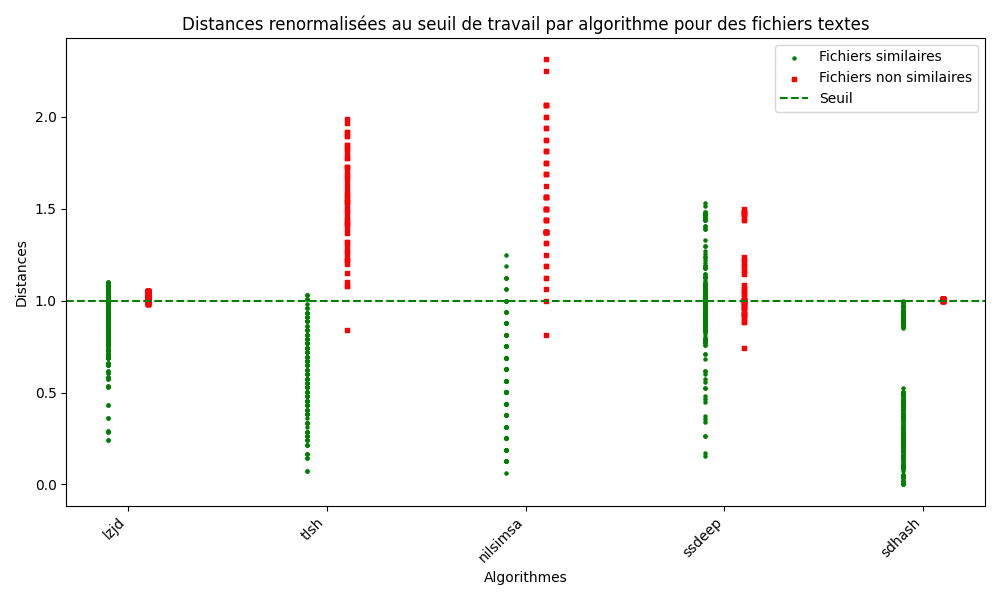

({'lzjd': 0.6734904534974997,
  'tlsh': 41.70854271356784,
  'nilsimsa': 15.989949748743719,
  'ssdeep': 64.67336683417085,
  'sdhash': 98.99497487437185},
 {'lzjd': <lib.analysis.Indicators at 0x1c1ad46a290>,
  'tlsh': <lib.analysis.Indicators at 0x1c1ad3b2190>,
  'nilsimsa': <lib.analysis.Indicators at 0x1c1ad2b30d0>,
  'ssdeep': <lib.analysis.Indicators at 0x1c1ad3b0bd0>,
  'sdhash': <lib.analysis.Indicators at 0x1c1ad14ead0>})

In [12]:
algo_comparison(core.runners(), 'text', 'noise')


# Images

### .bmp

Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']
Running ['nilsimsa'] with benchs ['image']
Running ['nilsimsa'] with benchs ['noise_images']
Running ['tlsh'] with benchs ['image']
Running ['tlsh'] with benchs ['noise_images']


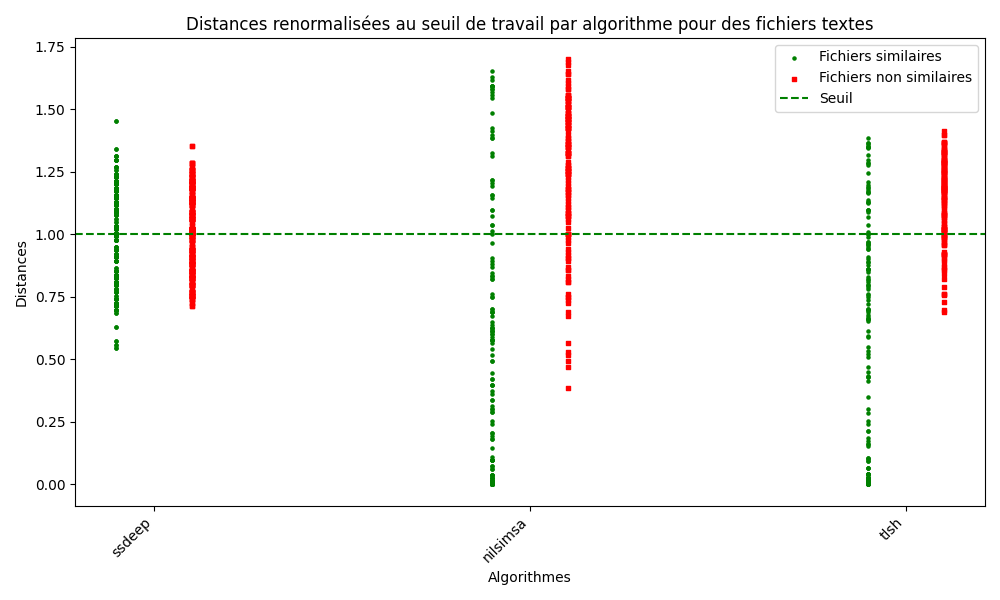

({'ssdeep': 71.59798994974875,
  'nilsimsa': 82.89949748743719,
  'tlsh': 149.50251256281408},
 {'ssdeep': <lib.analysis.Indicators at 0x1c1b2a1f5d0>,
  'nilsimsa': <lib.analysis.Indicators at 0x1c1b29dbfd0>,
  'tlsh': <lib.analysis.Indicators at 0x1c1b29ed890>})

In [13]:
algo_comparison(['ssdeep', 'nilsimsa', 'tlsh'], 'image', 'noise_images', suffix="bmp")

### .jpg

Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']
Running ['nilsimsa'] with benchs ['image']
Running ['nilsimsa'] with benchs ['noise_images']
Running ['tlsh'] with benchs ['image']
Running ['tlsh'] with benchs ['noise_images']


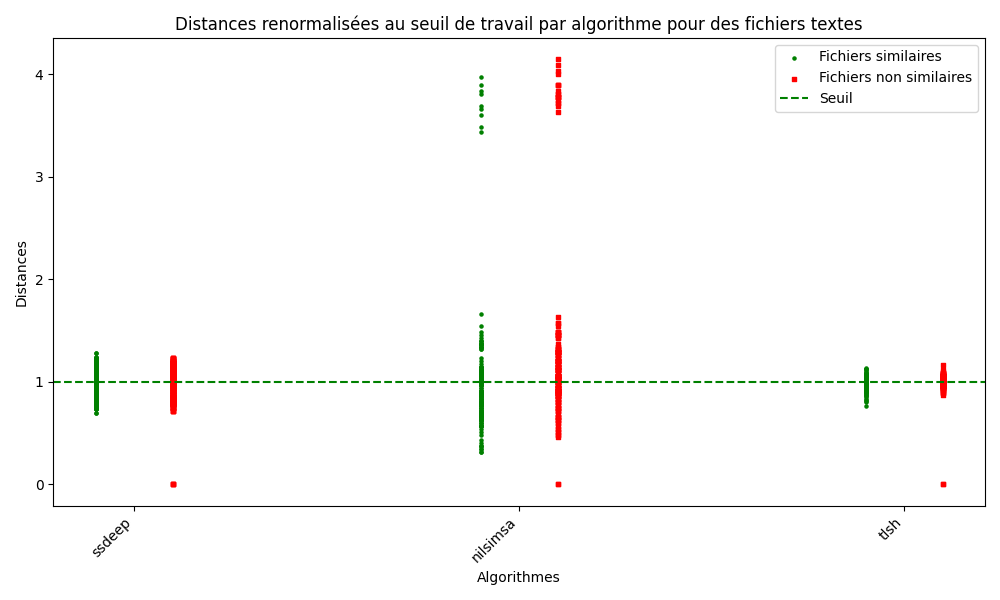

({'ssdeep': 77.8894472361809,
  'nilsimsa': 34.9748743718593,
  'tlsh': 180.45226130653265},
 {'ssdeep': <lib.analysis.Indicators at 0x1c1b2acf310>,
  'nilsimsa': <lib.analysis.Indicators at 0x1c1b2b2bfd0>,
  'tlsh': <lib.analysis.Indicators at 0x1c1b2f40e10>})

In [14]:
algo_comparison(['ssdeep', 'nilsimsa', 'tlsh'], 'image', 'noise_images', suffix="jpg")

### .png

Running ['ssdeep'] with benchs ['image']
Running ['ssdeep'] with benchs ['noise_images']
Running ['nilsimsa'] with benchs ['image']
Running ['nilsimsa'] with benchs ['noise_images']
Running ['tlsh'] with benchs ['image']
Running ['tlsh'] with benchs ['noise_images']


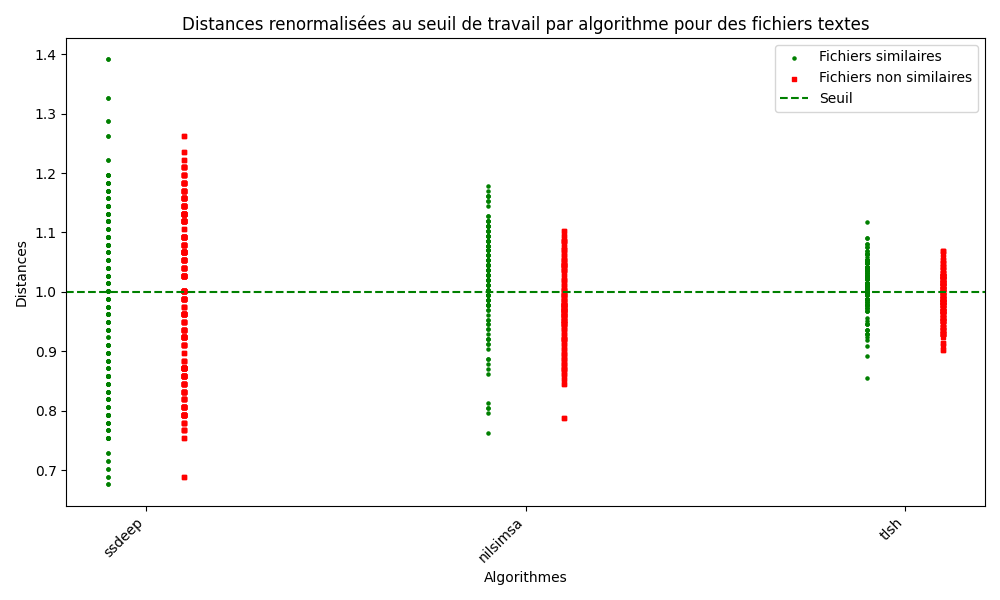

({'ssdeep': 76.8894472361809,
  'nilsimsa': 120.5929648241206,
  'tlsh': 186.05025125628143},
 {'ssdeep': <lib.analysis.Indicators at 0x1c1ad652790>,
  'nilsimsa': <lib.analysis.Indicators at 0x1c1ad652410>,
  'tlsh': <lib.analysis.Indicators at 0x1c1ad5dfb90>})

In [15]:
algo_comparison(['ssdeep', 'nilsimsa', 'tlsh'], 'image', 'noise_images', suffix="png")